In [3]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [4]:
experiments_path = pathlib.Path("../masks_results")

In [5]:
head_data = {

}
for task_dir in experiments_path.iterdir():
    head_data[task_dir.stem] = {}
    for seed_dir in task_dir.iterdir():
        head_mask = np.load(seed_dir / "head_mask.npy")
        head_importance = np.load(seed_dir / "head_importance.npy")
        head_data[task_dir.stem][seed_dir.stem] = {
            "head_mask": head_mask,
            "head_importance": head_importance
        }


# Task wise overlap % of pruned masks for each seed

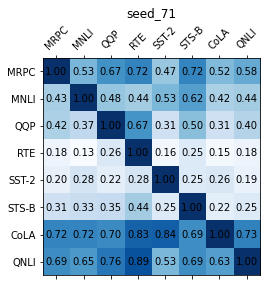

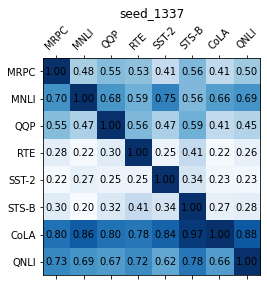

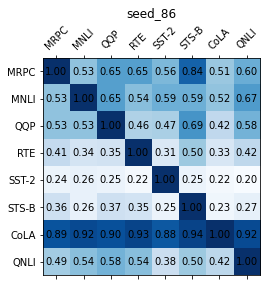

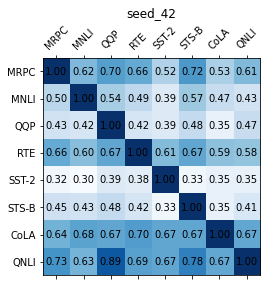

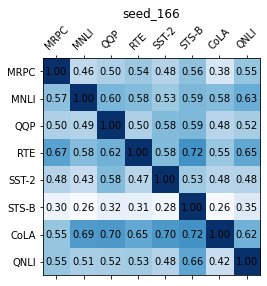

In [17]:
for seed in head_data["MNLI"].keys():
    mask_similarites = []
    tasks = [h for h in head_data.keys() if h != "WNLI"]
    for task_1 in tasks:
        mask_similarites.append([])
        for task_2 in tasks:
            mask_similarites[-1].append(np.sum(head_data[task_1][seed]["head_mask"] * head_data[task_2][seed]["head_mask"]))
    fig, ax = plt.subplots()
    intersection_matrix = np.array(mask_similarites)
    row_normalized_intersection_matrix = intersection_matrix / np.diagonal(intersection_matrix)
    ax.matshow(row_normalized_intersection_matrix, cmap=plt.cm.Blues)
    ax.set_xticklabels(['']+tasks, rotation=45)
    ax.set_yticklabels(['']+tasks)
    ax.set_title(seed, pad=30)

    for i in range(len(tasks)):
        for j in range(len(tasks)):
            c = row_normalized_intersection_matrix[j,i]
            ax.text(i, j, f"{c:.2f}", va='center', ha='center')



# Seed wise overlap % of pruned masks for each task


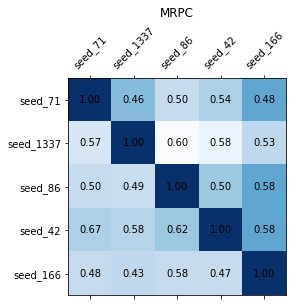

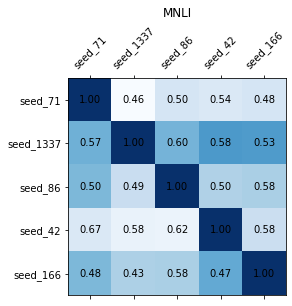

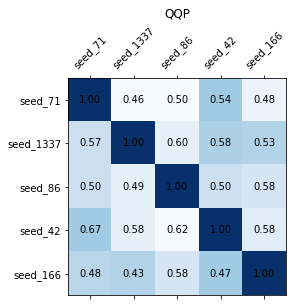

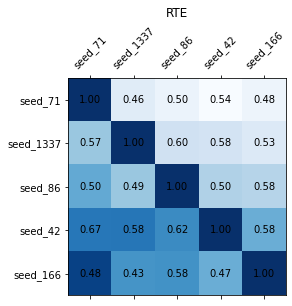

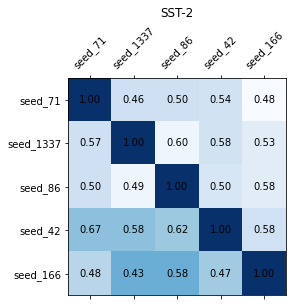

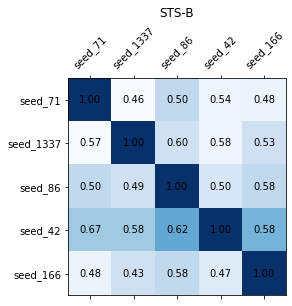

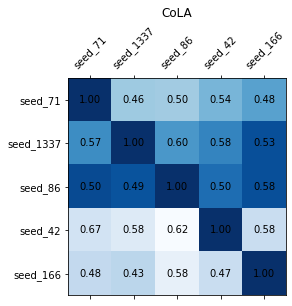

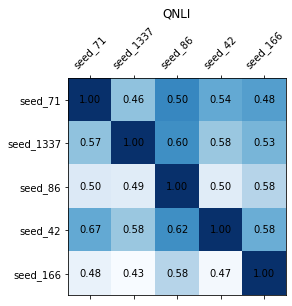

In [18]:
seeds = list(head_data["MNLI"].keys())
tasks = [h for h in head_data.keys() if h != "WNLI"]

for task in tasks:
    mask_similarites = []
    for seed_1 in seeds:
        mask_similarites.append([])
        for seed_2 in seeds:
            mask_similarites[-1].append(np.sum(head_data[task][seed_1]["head_mask"] * head_data[task][seed_2]["head_mask"]))
    fig, ax = plt.subplots()
    intersection_matrix = np.array(mask_similarites)
    row_normalized_intersection_matrix = intersection_matrix / np.diagonal(intersection_matrix)
    ax.matshow(row_normalized_intersection_matrix, cmap=plt.cm.Blues)
    ax.set_xticklabels(['']+seeds, rotation=45)
    ax.set_yticklabels(['']+seeds)
    ax.set_title(task, pad=50)

    for i in range(len(seeds)):
        for j in range(len(seeds)):
            c = normalized_intersection_matrix[j,i]
            ax.text(i, j, f"{c:.2f}", va='center', ha='center')

